In [7]:
%load_ext autoreload
%autoreload 2
from RTKToArrayConversion import *
from ExtendedConeBeamDCC import *
from ConeBeamDCCWithBackprojectionPlane import *
%matplotlib notebook
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
filesdir_ref = ""
# reading projections
proj = itk.imread(filesdir_ref+"projections_thorax_37_180_920x1028_shrink1.mha")
# Reading the geometry of the scanner
xmlreader = rtk.ThreeDCircularProjectionGeometryXMLFileReader.New()
xmlreader.SetFilename(filesdir_ref+'geometry_thorax_37_180_920x1028_shrink1.xml')
# xmlreader.SetFilename(filesdir_ref+"geometry.xml")
xmlreader.GenerateOutputInformation()
geometry = xmlreader.GetOutputObject()
print('nproj = %d'%(len(geometry.GetGantryAngles())))
print(proj.GetLargestPossibleRegion().GetSize())

nproj = 2
itkSize3 ([920, 32, 2])


itkVectorD3 ([1.028, 1.095, 1])
[array([1.028, 1.095, 1.   ]), array([-472.366 ,  -16.9725,   -0.5   ]), array([920,  32,   2]), array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])]
1.2166227701586831


<IPython.core.display.Javascript object>


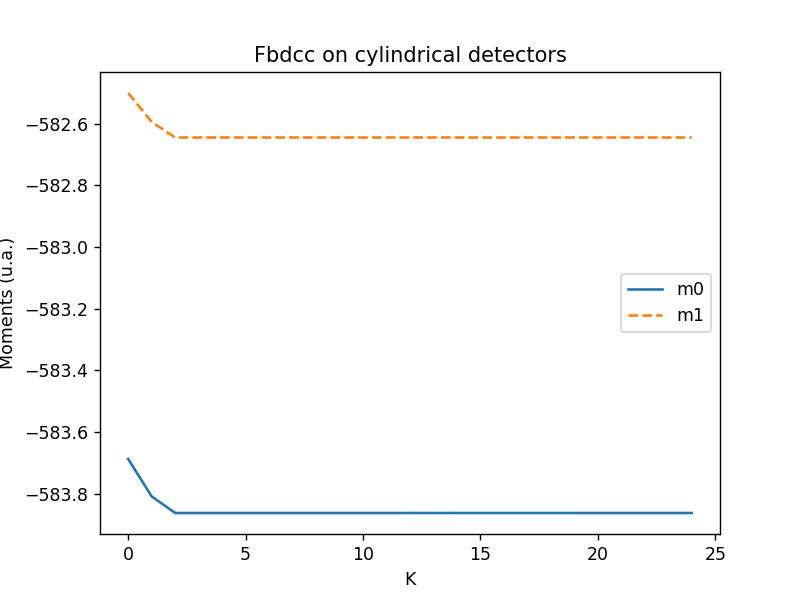

<IPython.core.display.Javascript object>


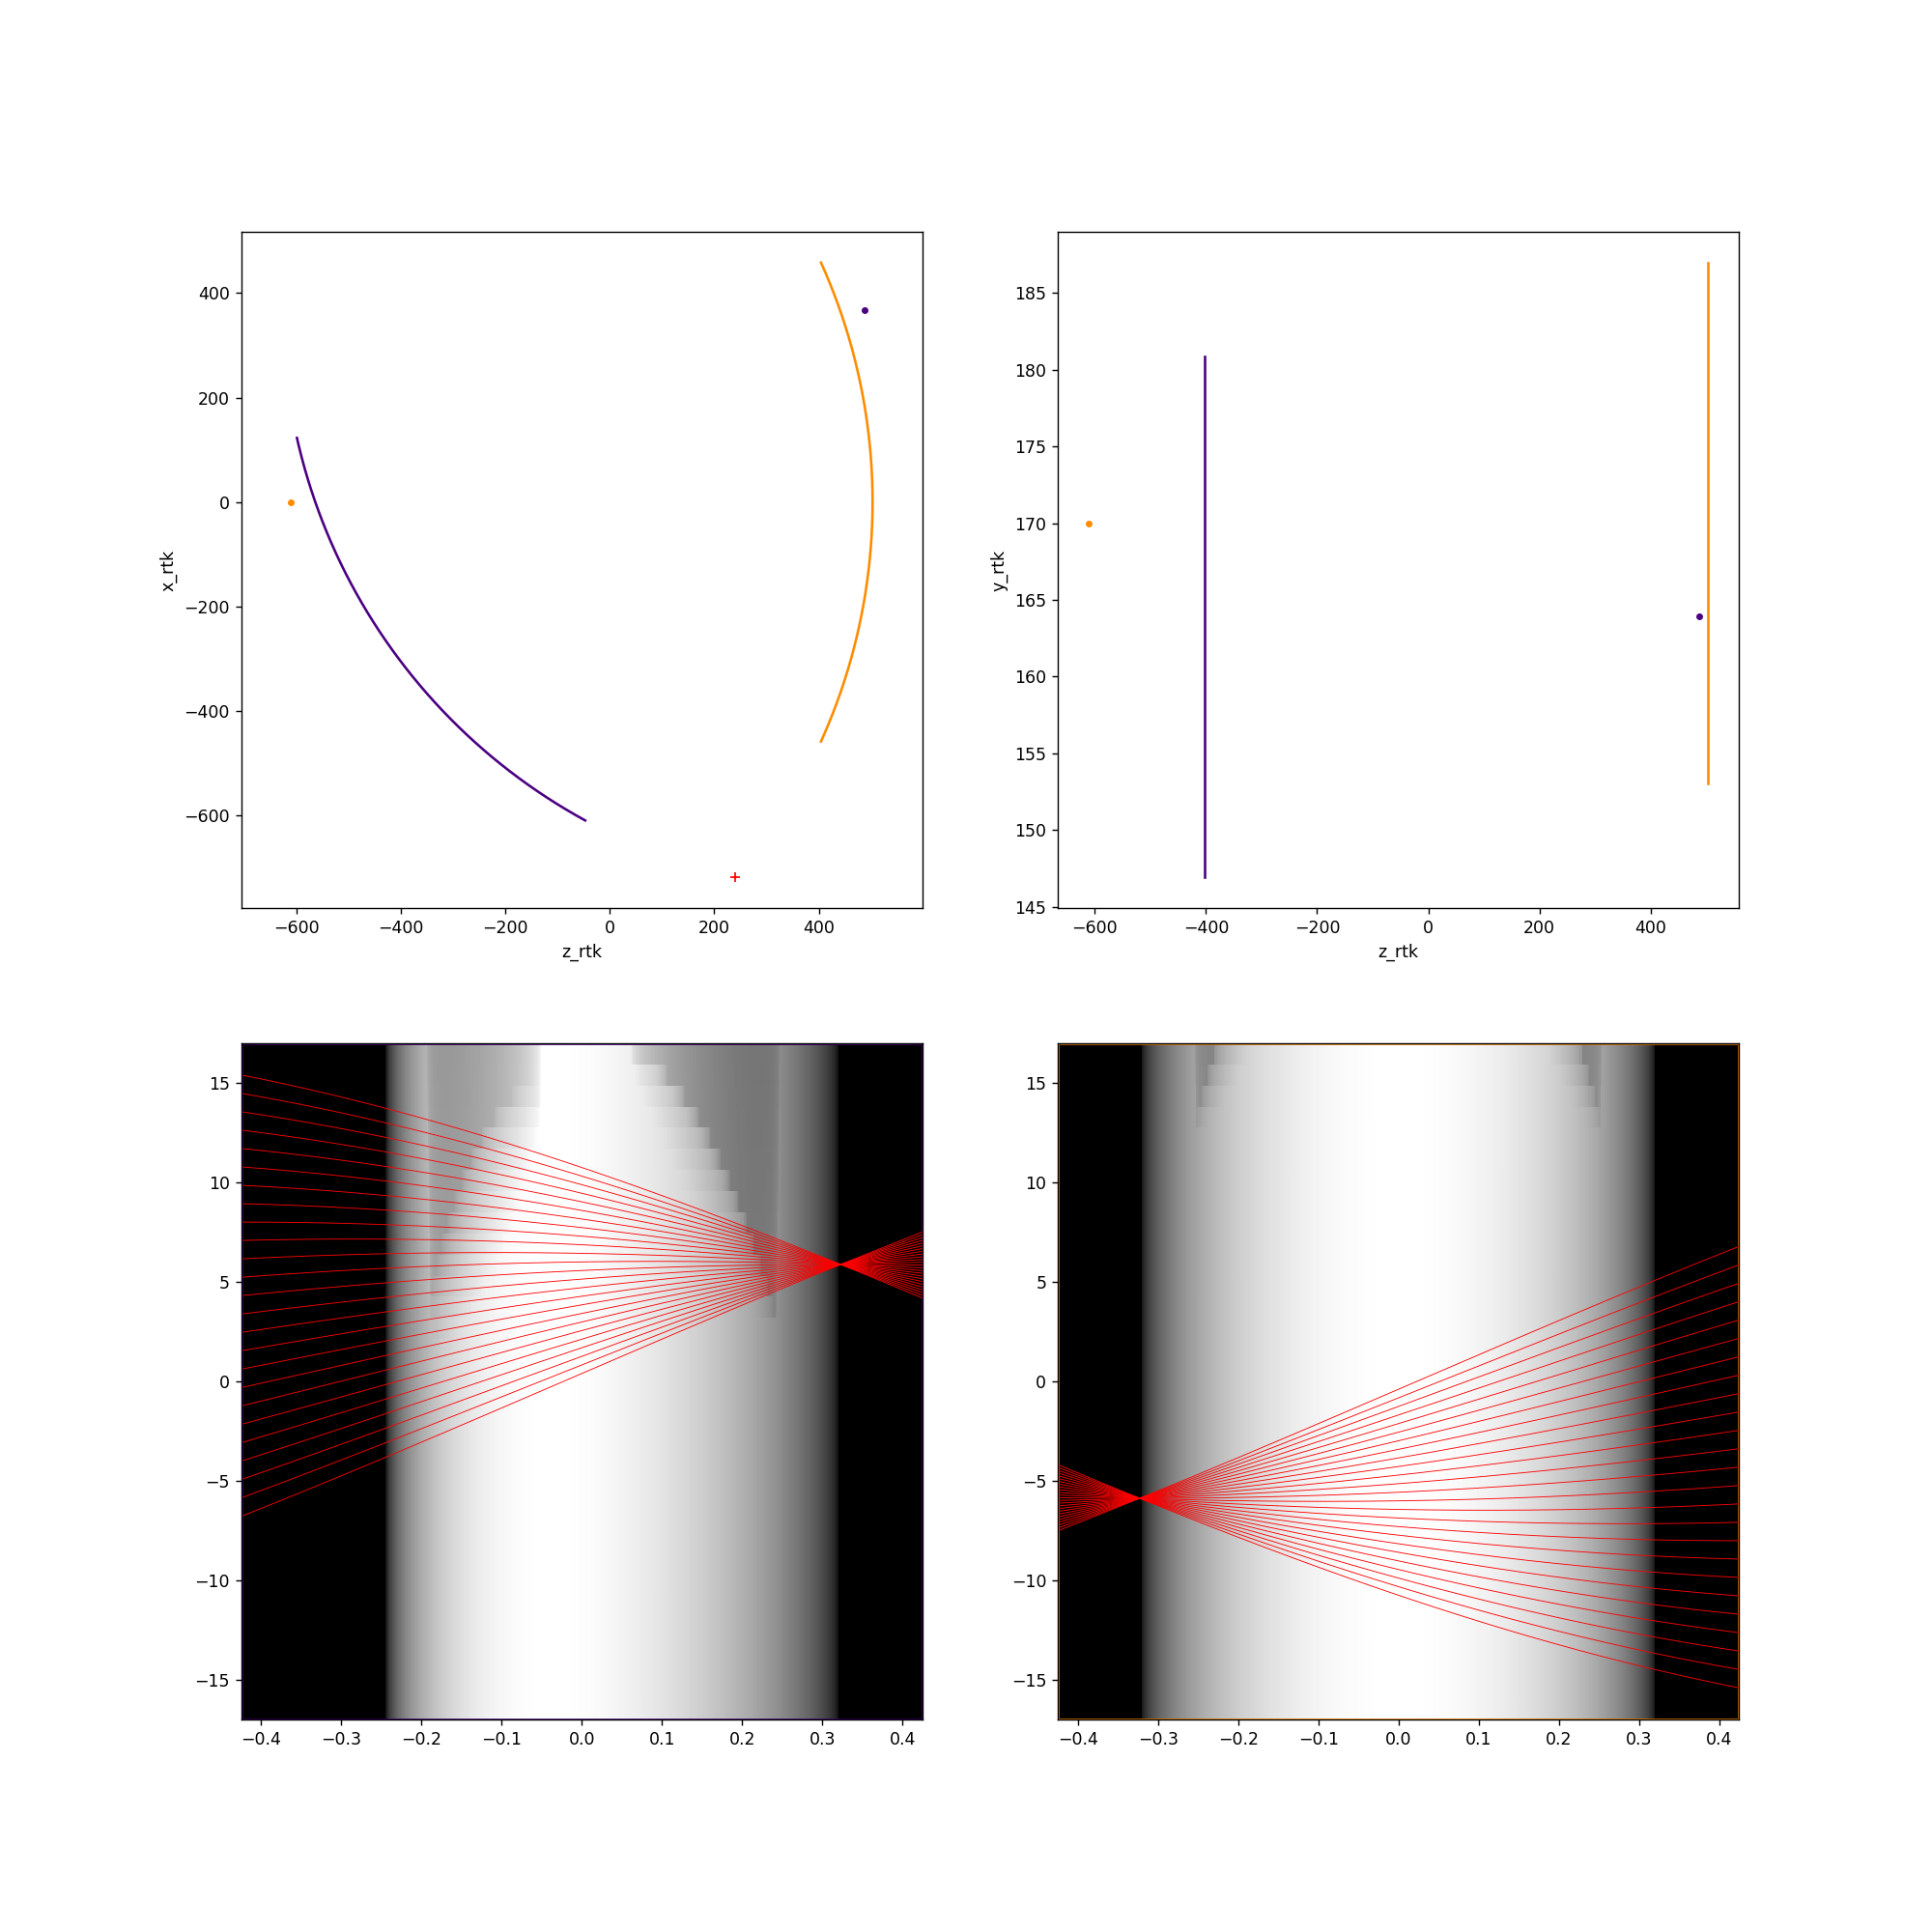

In [52]:
#shrinkage
ImageType = itk.Image[itk.F,3]
rebin = itk.BinShrinkImageFilter[ImageType,ImageType].New()
rebin.SetInput(proj)
rebin.SetShrinkFactor(0,1)
rebin.Update()
proj_rebin = rebin.GetOutput()
print(proj_rebin.GetSpacing())


# I0=0
# dH2O=0.01879 #mm^-1 at 75 keV
# if I0!=0:
#     new_sino = I0*np.exp(-1.*dH2O*itk.GetArrayFromImage(proj_rebin))
#     new_sino = np.maximum(np.random.poisson(new_sino), 1)
#     new_sino = np.log(I0/new_sino)/dH2O
#     proj_rebin_n = itk.GetImageFromArray(new_sino.astype(np.float32))
#     proj_rebin_n.CopyInformation(proj_rebin)
#     proj_rebin_n.Update()
# #    itk.imwrite(proj,filesdir_ref + 'projections_thorax_360_shrink10_a170_noise.mha') 

# Select the pair
idx0, idx1 = 0, 1
# Compute moments with backprojection plane

# start = time.time()
# pair_bp = ProjectionsPairBP(idx0, idx1, geometry, proj)
# pair_bp.LinesMomentsCorners()
# print(time.time()-start)
# pair_bp.PlotPairMoments()

#Convert to array for faster computation directly on the physical detector
geometry_array = RTKtoNP(geometry)
proj_array = itk.GetArrayFromImage(proj_rebin)
proj_infos = GetProjectionInformations(proj_rebin)
source_pos_array = GetSourcePositions(geometry)
rotation_matrices_array = GetRotationMatrices(geometry)
fixed_matrices_array = GetFixedSystemMatrices(geometry)
print(proj_infos)

start = time.time()
pair = ProjectionsPair(idx0, idx1 , geometry_array, source_pos_array, rotation_matrices_array, fixed_matrices_array, proj_array, proj_infos)
pair.ComputePairMoments()
print(Difference(pair.m0, pair.m1))
pair.PlotPairMoments()
pair.PlotPairGeometry()
